## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 800
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

# Snap view of the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df_dim = df.shape
print("This dataset has {} rows(data records) and {} columns(features).".format(df_dim[0],df_dim[1]))

This dataset has 294478 rows(data records) and 5 columns(features).


c. The number of unique users in the dataset.

In [4]:
df_unique_users = df.user_id.nunique()
print("This dataset has {} unique users.".format(df_unique_users))

This dataset has 290584 unique users.


d. The proportion of users converted.

In [5]:
df_converted_percnt = df.converted.mean() * 100
print("The proportion of users converted = {:.3f}%.".format(df_converted_percnt))

The proportion of users converted = 11.966%.


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#Use 'query' method to check up the mismatch between two values
# data records where 'treatment' matches with 'old_page' 
mismatch_query1_count = df.query('group == "treatment" and landing_page == "old_page"').count()['user_id']

# data records where 'control' matches with 'new_page' 
mismatch_query2_count = df.query('group == "control" and landing_page == "new_page"').count()['user_id']

#compute the total mismatches
mismatches = mismatch_query1_count + mismatch_query2_count

#print the total mismatches
print("The total mismatches between 'new_page' and 'treatment' groups = {}.".format(mismatches))

The total mismatches between 'new_page' and 'treatment' groups = 3893.


f. Do any of the rows have missing values?

In [7]:
#use isna fucntion to check null/misising values
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#First take a copy of the original dataset
df2 = df.copy()

In [9]:
# drop rows for mismatched treatment groups
df2 = df2[~((df2.group == 'treatment') & (df2.landing_page == 'old_page'))]
# drop rows for mismatched control groups
df2 = df2[~((df2.group == 'control')  & (df2.landing_page == 'new_page'))]

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2_unique_users = df2.user_id.nunique()
print("The df2 has {} unique users.".format(df_unique_users))

The df2 has 290584 unique users.


b. There is one **user_id** repeated in **df2**.  What is it?

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(df2.index[2893], inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.describe()

,user_id,converted
count,290584.000000,290584.000000
mean,788005.218632,0.119597
std,91224.493132,0.324490
min,630000.000000,0.000000
25%,709035.750000,0.000000
50%,787995.500000,0.000000
75%,866956.250000,0.000000
max,945999.000000,1.000000


In [16]:
prob_converted = df2.converted.mean()
print("There is a {:.5f} probability of an individual converting regardless of the page they receive.".format(prob_converted))

There is a 0.11960 probability of an individual converting regardless of the page they receive.


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
prob_converted_control = df2.query('group == "control"').converted.mean()
print("There is a {:.5f} probability of an individuals converted given they were in the control group.".format(prob_converted_control))

There is a 0.12039 probability of an individuals converted given they were in the control group.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
prob_converted_treatment = df2.query('group == "treatment"').converted.mean()
print("There is a {:.5f} probability of an individuals converted given they were in the treatment group.".format(prob_converted_treatment))

There is a 0.11881 probability of an individuals converted given they were in the treatment group.


d. What is the probability that an individual received the new page?

In [19]:
individuals_new_pages = len(df.query('group == "treatment"'))

individuals_total = df.shape[0]

prob_individuals_new_page = individuals_new_pages / individuals_total

print("There is a {} probability  that an individual received the new page.".format(prob_individuals_new_page))

There is a 0.5001256460584492 probability  that an individual received the new page.


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**I think there is no sufficient evidence that the treatment page leads to more conversions. As the probability that the individual received a new page is 0.5, which is fairly distributed probability that cant lead to a certain conclusion.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

* **Null Hypothesis**: $H_0: p_{new} - p_{old} <= 0$

* **Alternative Hypothesis**: $H_1: p_{new} - p_{old} > 0$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
print(p_new)

0.119597087245


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
print(p_old)

0.119597087245


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query("group == 'treatment'").count()['user_id']
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query("group == 'control'").count()['user_id']
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_old, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
print("New page converted shape = ",new_page_converted.shape[0],", Old page converted shape = ",old_page_converted.shape[0])

New page converted shape =  145310 , Old page converted shape =  145274


Since `new_page_converted` and `old_page_converted` have sizes of ***145310*** and ***145274*** respectively. Therefore we shouldn't  compute the difference directly. Sowe need to  truncate `new_page_converted` to the sampe shape of  `old_page_converted` (**NOTE** this will cause the loss of **36** rows but it shouldn't affect the whole computation since ***36*** <<< ***145310***).

In [27]:
new_page_converted = new_page_converted[:n_old]

#Check the modified shape
print("new_page_converted shape = ",new_page_converted.shape[0],", old_page_converted = ",old_page_converted.shape[0])

new_page_converted shape =  145274 , old_page_converted =  145274


In [28]:
p_diff = np.average(new_page_converted) - np.average(old_page_converted)
p_diff

0.00051626581494279566

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [29]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [30]:
#Define histogram helper plot function
def plot_hist(data_arr, bins, title, x_title, y_title, vert_value=None, vert_label=None):
    plt.figure(dpi=120);
    plt.hist(data_arr, bins=bins, ec='black', color='indigo');
    plt.title(title, fontsize=13, color='blue');
    plt.ylabel(x_title, fontsize=10);
    plt.xlabel(y_title, fontsize=10);
    if vert_value is not None:
        plt.axvline(x=vert_value, color='firebrick', label=vert_label, linewidth=2);
        plt.legend(fontsize=8);
        

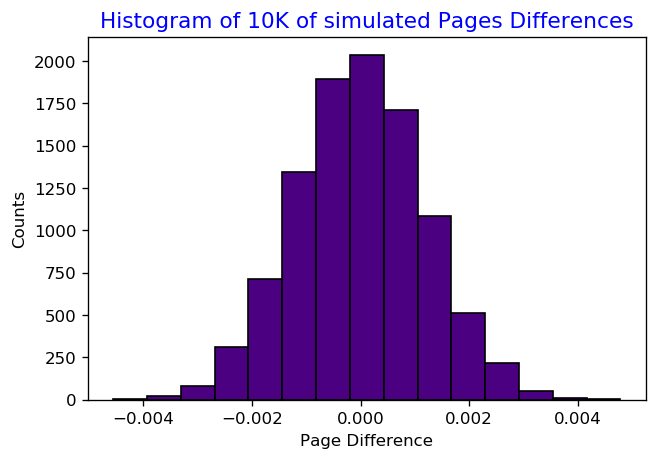

In [31]:
plot_hist(p_diffs, 15, 'Histogram of 10K of simulated Pages Differences', 'Counts', 'Page Difference')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
# Create new dataframes df_control and df_treatment that contain records of each group separately
df_control = df2.loc[df['group'] == "control"]
df_treatment = df2.loc[df['group'] == "treatment"]

In [33]:
# compute the observed pages difference
obs_p_diff = np.average(df_treatment['converted']) - np.average(df_control['converted'])
obs_p_diff

-0.0015782389853555567

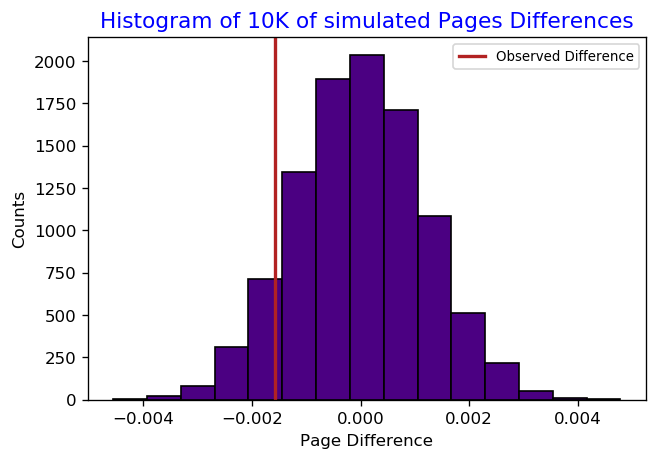

In [34]:
plot_hist(p_diffs, 15, 'Histogram of 10K of simulated Pages Differences', 'Counts', 
          'Page Difference',obs_p_diff , 'Observed Difference')

In [35]:
#Convert p_diffs list into numpy array to apply mathematical operations (mean operation)
p_diffs = np.array(p_diffs)

proportion = (obs_p_diff < p_diffs).mean()
print("There is a {:.4f} proportion of the p_diffs that are greater than the actual difference observed in our data.".format(proportion))

There is a 0.9063 proportion of the p_diffs that are greater than the actual difference observed in our data.


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* We already have computed the **p-value** in the previuos part. 

* According to information from this [resource](https://desktop.arcgis.com/en/arcmap/10.4/tools/spatial-statistics-toolbox/what-is-a-z-score-what-is-a-p-value.htm), the **p-value** is the probability that the observed spatial pattern was created by some random process.

* When the **p-value** is ***very small (<0.05)***, it means it is very unlikely (small probability) that the observed spatial pattern is the result of random processes, so you can reject the null hypothesis. **Otherwise** we ***cannot*** reject the null hypothesis.

* Investigating the calculated value `proportion` which equal **0.9031** which is **extremely larger** than the threshold value(0.05). So according to the cited resource, we **cannot reject the Null hypothesis** $H_0$ in our case.
    

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = df2[(df2.landing_page == 'old_page') & (df2.converted == 1)].count()['user_id']
convert_new = df2[(df2.landing_page == 'new_page') & (df2.converted == 1)].count()['user_id']
n_old = df2[(df2.landing_page == 'old_page')].count()['user_id']
n_new = df2[(df2.landing_page == 'new_page')].count()['user_id']

print("""The computed values is as following: convert_old = {}, convert_new = {}, n_old = {} and n_new = {}"""
      .format(convert_old, convert_new, n_old, n_new))

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The computed values is as following: convert_old = 17489, convert_new = 17264, n_old = 145274 and n_new = 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [37]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old,n_new], alternative='smaller')
print('p_value = ',p_value)
print('z_score = ',z_score)

p_value =  0.905058312759
z_score =  1.31092419842


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<img src="https://desktop.arcgis.com/en/arcmap/10.4/tools/spatial-statistics-toolbox/GUID-CBF63B74-D1B2-44FC-A316-7AC2B1C1D464-web.png" alt="" style="height: 396px; width:570px;"/>

* According to this image that states the `p-value` and `z-score` ranges among the normal distribution, we can observe that to reach a **Confidence level** of more that **95%** we should have **z-score** (Standard Deviations) value in range **]-1.96, 1.96[**,  and the **p-value** (Probability) value to be **< 0.05**.

* Since our **z-score = 1.31** is between **-1.96** and **+1.96**, which lead to uncorrected **p-value = 0.905** that is larger than 0.05, Hence we ***cannot reject our null hypothesis*** because the pattern exhibited could very likely be the result of random spatial processes.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
#Add an intercept column.
df2['intercept'] = 1

#Add ab_page column where treatment and control groups expressed as 1 and 0 respectiely.
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

#Show the new modifications
df2.sample(n=5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
125487,888637,2017-01-14 10:41:27.512834,control,old_page,0,1,0
233367,699799,2017-01-24 04:20:04.471491,treatment,new_page,0,1,1
118502,876486,2017-01-15 21:03:02.580435,control,old_page,0,1,0
180053,889600,2017-01-24 12:07:17.830860,control,old_page,0,1,0
46661,889956,2017-01-03 05:34:30.492853,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [39]:
import statsmodels.api as sm
model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-11 03:02 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

* The `p-value` associated with `ab_page` is **0.1899**, Therefore we can conclude that the new page landing is not statistically significant in decision of customers whether to convert or not. 
* The **Null hypothesis** is that when ab_page = 1, converted = 0; while the **Alternative hypothesis** is that when ab_page = 1, converted is more likely to be 1.
* The `p-value` computed here is differ from Part II, because the null and alternative hypotheses associated with our regression model are set to be: 
    * $H_0: p_{new} - p_{old} != 0$
    * $H_1: p_{new} - p_{old} = 0$
    
    instead of :
    * $H_0: p_{new} - p_{old} <= 0$
    * $H_1: p_{new} - p_{old} > 0$

**Hence**, when computing model **`p-value`**, we will take the proportion of the 10K simulated distribution that is greater than our observed difference (the values that are greater than the red line in the second histogram visualization).

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* Adding additional terms variables makes our hypothesis results as they  could offer a potencial influences on the conversion rate.

* The disadvantages to adding additional terms into the regression model is that even with additional terms we can never account for all influencing factors or multicolinearity can exists which can make wrong results. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
# Loading data from countries.csv file
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [42]:
#Joining the 2 datasets together
df3 = df2.join(df_countries.set_index('user_id'), on='user_id')

#Show samples of dataframe df3
df3.sample(n=5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
152488,828207,2017-01-05 03:48:34.883127,treatment,new_page,0,1,1,US
115440,836557,2017-01-20 21:59:25.461952,control,old_page,0,1,0,US
270751,655192,2017-01-07 09:27:51.653828,control,old_page,0,1,0,US
143709,645584,2017-01-19 16:31:33.258043,treatment,new_page,0,1,1,US
76429,669898,2017-01-08 08:44:45.039754,treatment,new_page,0,1,1,US


In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 8 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
country         290584 non-null object
dtypes: int64(3), object(4), uint8(1)
memory usage: 18.0+ MB


In [44]:
df3['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [45]:
# Create the necessary dummy variables
df3[['CA','UK', 'US']]= pd.get_dummies(df3['country'])

#Using the provided Hint -> "You will need two columns for the three dummy variables".
df3.drop(labels=['CA'], axis=1, inplace=True)

#Show the new modifications
df3.sample(n=5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
36414,851117,2017-01-17 03:58:29.654680,control,old_page,0,1,0,US,0,1
267635,719532,2017-01-10 16:19:10.242262,treatment,new_page,0,1,1,CA,0,0
205830,750983,2017-01-04 18:43:35.810006,control,old_page,0,1,0,CA,0,0
138624,913932,2017-01-20 00:08:47.055192,control,old_page,0,1,0,US,0,1
109861,881260,2017-01-23 01:37:38.901625,treatment,new_page,0,1,1,US,0,1


In [46]:
#calculate the Interactions with the adjusted variable names as following
df3['ab_UK'] = df3['ab_page'] * df3['UK']
df3['ab_US'] = df3['ab_page'] * df3['US']

#Show the new modifications
df3.sample(n=5)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,ab_UK,ab_US
260782,737323,2017-01-11 08:47:56.457698,control,old_page,0,1,0,US,0,1,0,0
225446,938970,2017-01-16 18:51:14.284578,treatment,new_page,0,1,1,US,0,1,0,1
211146,747804,2017-01-18 10:26:47.630781,control,old_page,0,1,0,US,0,1,0,0
77361,697619,2017-01-20 22:49:37.239216,control,old_page,0,1,0,UK,1,0,0,0
291314,927305,2017-01-06 00:46:50.950552,control,old_page,0,1,0,US,0,1,0,0


In [47]:
#adding lower order terms to the model, those are the ones which where used for multiplication,
# like ab\_page, and the corresponding country variable. 
model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'UK', 'US', 'ab_UK', 'ab_US']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-08-11 03:02 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
ab_UK          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
ab_US          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

### Conclusions and Limitations

* According to the analysis performed, we notice that the **p_value** for all interaction terms is much higher than 0.05 (this also yields that **z-score** value of interaction items lies in the range ]-1.96,1.96[ ).

* Therefore, we **fail to reject the null hypothesis $H_0$** as there is no sufficient information to suggest that there is an interaction between page and country as there is no significant effects on conversion.

* These statistics and results are analyzed on the given data. So some limitations due to many reasons including lack of data records, incorrect data items, and some missing columns.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

### External Sources
* https://desktop.arcgis.com/en/arcmap/10.4/tools/spatial-statistics-toolbox/what-is-a-z-score-what-is-a-p-value.htm

* https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob

* https://stackoverflow.com/questions/39870642/matplotlib-how-to-plot-a-high-resolution-graph

* https://stackoverflow.com/questions/42542252/cannot-get-histogram-to-show-separated-bins-with-vertical-lines

* https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

* https://stackoverflow.com/questions/42096418/pandas-drop-row-with-multiple-columns